In [118]:
print("-----------------------------------------------------------------------------")
print("Data Analysis Project on Titanic")
print("-----------------------------------------------------------------------------")
print("1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)")
print("2.) What deck were the passengers on and how does that relate to their class?")
print("3.) Where did the passengers come from?")
print("4.) Who was alone and who was with family?")
print("5.) What factors helped someone survive the sinking?")
print("6.) Did having a family member increase the odds of surviving the crash?")
print("-----------------------------------------------------------------------------")

-----------------------------------------------------------------------------
Data Analysis Project on Titanic
-----------------------------------------------------------------------------
1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?
5.) What factors helped someone survive the sinking?
6.) Did having a family member increase the odds of surviving the crash?
-----------------------------------------------------------------------------


In [119]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
titanicdf=pd.read_csv('train.csv')

In [121]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
titanicdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [123]:
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [124]:
def male_female_child(passenger):
    age,sex=passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [125]:
titanicdf['Person']=titanicdf[['Age','Sex']].apply(male_female_child,axis=1)

In [126]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


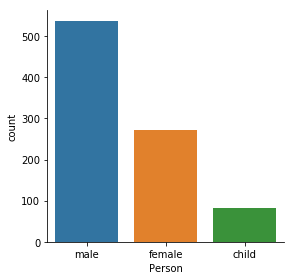

In [127]:
sns.factorplot("Person",data=titanicdf,kind='count')

In [128]:
titanicdf['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [129]:
titanicdf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [130]:
print("Sadly,a lot of passengers didn't survive. :(")

Sadly,a lot of passengers didn't survive. :(


In [131]:
print("The mean age of the passengers aboard is",titanicdf['Age'].mean())

The mean age of the passengers aboard is 29.69911764705882


In [132]:
titanicdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


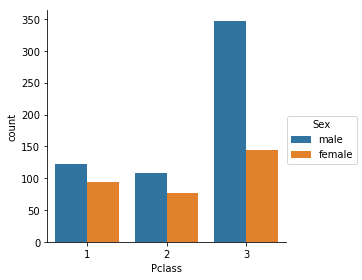

In [133]:
sns.factorplot("Pclass",data=titanicdf,kind='count',hue='Sex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E7FEDB4E0>]], dtype=object)

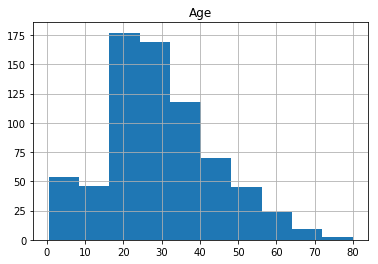

In [134]:
titanicdf.hist('Age')

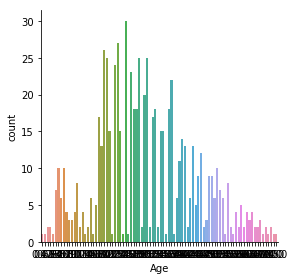

In [135]:
sns.factorplot("Age",data=titanicdf,kind='count')

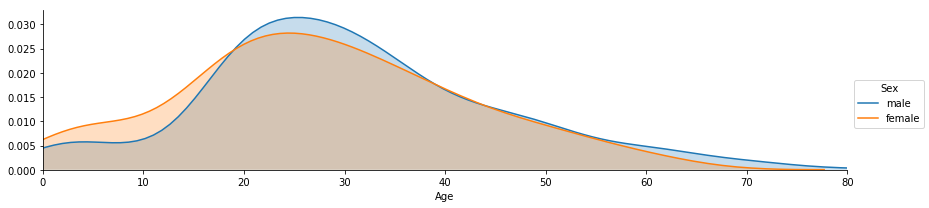

In [136]:
fig=sns.FacetGrid(titanicdf,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanicdf['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

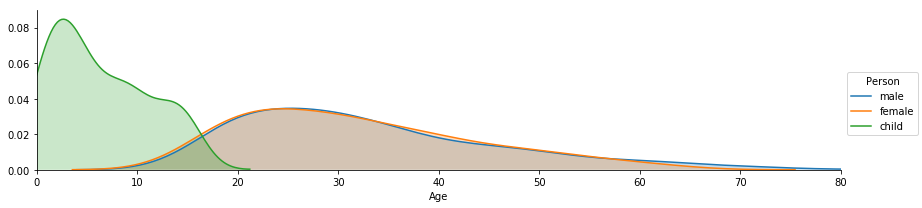

In [137]:
fig=sns.FacetGrid(titanicdf,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanicdf['Age'].max()
fig.set(xlim=(0,oldest),ylim=(0,0.09))
fig.add_legend()

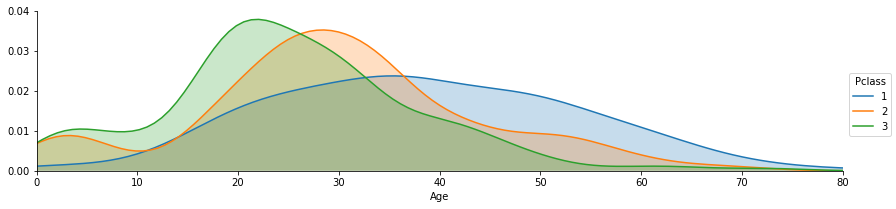

In [138]:
fig=sns.FacetGrid(titanicdf,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanicdf['Age'].max()
fig.set(xlim=(0,oldest),ylim=(0,0.04))
fig.add_legend()

In [139]:
print("We've got a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question:") 
print("2.)What deck were the passengers on and how does that relate to their class?")

We've got a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question:
2.)What deck were the passengers on and how does that relate to their class?


In [140]:
deck=titanicdf['Cabin'].dropna()

In [141]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [142]:
l=[]

for n in deck:
    l.extend(n[0])
l.sort()        

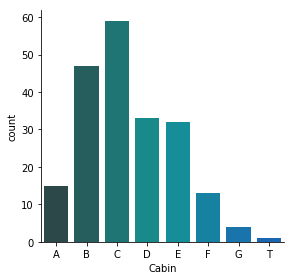

In [143]:
cabindf=DataFrame(l)
cabindf.columns=['Cabin']
sns.factorplot('Cabin',data=cabindf,palette='winter_d',kind='count')

In [144]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [145]:
cabindf=cabindf[cabindf['Cabin']!='T']

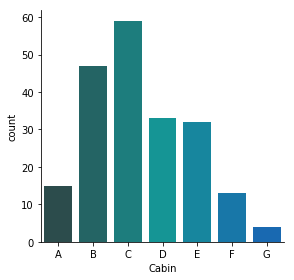

In [146]:
sns.factorplot('Cabin',data=cabindf,palette='winter_d',kind='count')

In [147]:
print("We've analyzed the distribution by decks, let's go ahead and answer our third question:")
print("3.) Where did the passengers come from?")

We've analyzed the distribution by decks, let's go ahead and answer our third question:
3.) Where did the passengers come from?


S-> Southhampton
C-> Cherbourg
Q-> Queenstown


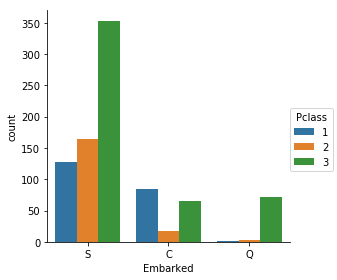

In [148]:
sns.factorplot('Embarked',data=titanicdf,hue='Pclass',kind='count')
print("S-> Southhampton")
print("C-> Cherbourg")
print("Q-> Queenstown")

In [149]:
print("An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be interesting to look at the economics of that town in that time period for further investigation.")
print("Now let's take a look at the 4th question:")
print("4.) Who was alone and who was with family?")

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be interesting to look at the economics of that town in that time period for further investigation.
Now let's take a look at the 4th question:
4.) Who was alone and who was with family?


In [150]:
titanicdf['Alone']=titanicdf.SibSp+titanicdf.Parch

In [151]:
titanicdf['Alone'].loc[titanicdf['Alone']>0]='With Family'
titanicdf['Alone'].loc[titanicdf['Alone']==0]='Alone'


D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


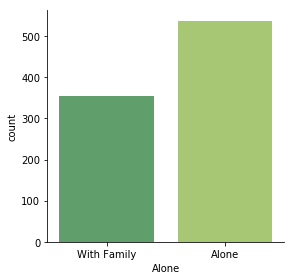

In [152]:
sns.factorplot('Alone',data=titanicdf,kind='count',palette='summer')

In [153]:
print("An interesting find here is that there were more number of people travelling alone.")
print("Let's move on to our next question:")
print("5.) What factors helped someone survive the sinking?")

An interesting find here is that there were more number of people travelling alone.
Let's move on to our next question:
5.) What factors helped someone survive the sinking?


In [154]:
titanicdf['Survivor']=titanicdf.Survived.map({0:'No',1:'Yes'})

In [155]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


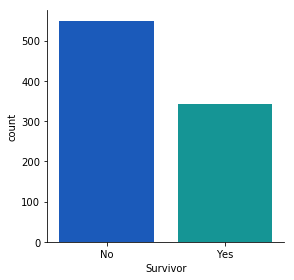

In [156]:
sns.factorplot('Survivor',data=titanicdf,kind='count',palette='winter')

In [157]:
print("So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.")

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.


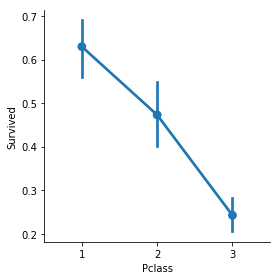

In [158]:
sns.factorplot('Pclass','Survived',data=titanicdf)

In [159]:
print("Looks like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. ")

Looks like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. 


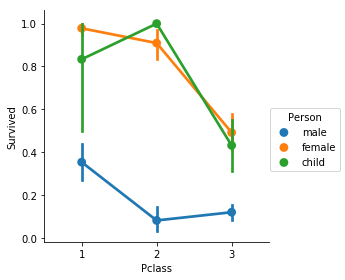

In [160]:
sns.factorplot('Pclass','Survived',data=titanicdf,hue='Person')

In [161]:
print("From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.")


From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.


In [162]:
print("But what about age? Did being younger or older have an effect on survival rate?")

But what about age? Did being younger or older have an effect on survival rate?


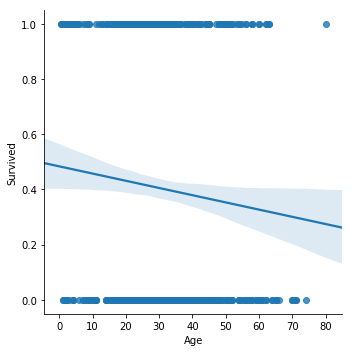

In [163]:
sns.lmplot('Age','Survived',data=titanicdf)

In [164]:
print("Looks like there is a general trend that the older the passenger was, the less likely they survived.")

Looks like there is a general trend that the older the passenger was, the less likely they survived.


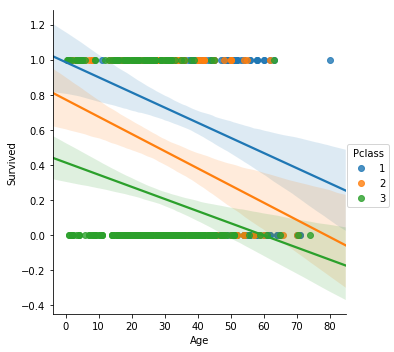

In [165]:
sns.lmplot('Age','Survived',data=titanicdf,hue='Pclass')

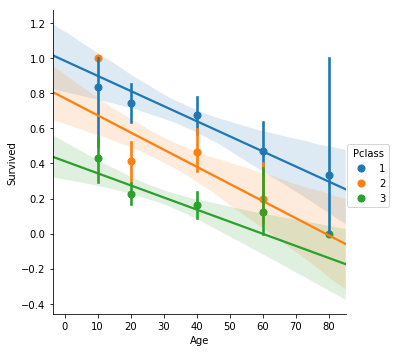

In [166]:
generation=[10,20,40,60,80]
sns.lmplot('Age','Survived',data=titanicdf,hue='Pclass',x_bins=generation)

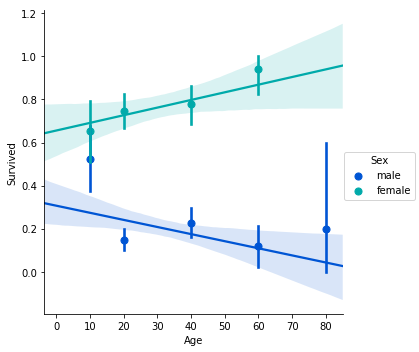

In [167]:
sns.lmplot('Age','Survived',data=titanicdf,hue='Sex',palette='winter',x_bins=generation)

In [168]:
print("We've got some really great insights on how gender,age, and class all related to a passengers chance of survival.")
print("Let's move on to our final question:")
print("6.) Did having a family member increase the odds of surviving the crash?")

We've got some really great insights on how gender,age, and class all related to a passengers chance of survival.
Let's move on to our final question:
6.) Did having a family member increase the odds of surviving the crash?


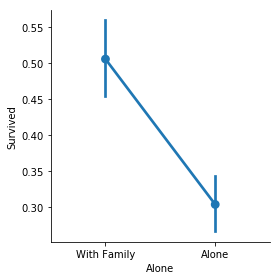

In [169]:
sns.factorplot('Alone','Survived',data=titanicdf)

In [170]:
print("Suprisingly, more number of people with family have survived the crash than those who were alone which is quite opposite to our intuition.")

Suprisingly, more number of people with family have survived the crash than those who were alone which is quite opposite to our intuition.


In [171]:
print("End of analysis :)")

End of analysis :)
